In [2]:
# Import libraries
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install seaborn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/10.7 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.7 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/10.7 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/10.7 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/10.7 MB 3.1 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/10.7 MB 3.0 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/10.7 MB 3.0 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.7 MB 2.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/10.7 MB 2.8 MB/s eta 0:00:02
   ----------------------- ---------------- 6.3/10.7 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 6.6/10.7 MB 2.7 MB/s eta 0:00:02
   ---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data and store to df
import requests 

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

file_name = "usedcars.csv"

response = requests.get(file_path)

# Make sure the dataset succesfully downloaded (status code 200)
if response.status_code == 200:
    # Open file in 'write binary' (wb) and save the content
    with open(file_name, "wb") as f:
        f.write(response.content)
    print(f"File '{file_name}' berhasil diunduh.")
    
# Directly load file into pandas dataframe
    df = pd.read_csv(file_name)
    print("DataFrame berhasil dibuat.")
    df.head()
else:
    print(f"Gagal mengunduh file. Status code: {response.status_code}")

File 'usedcars.csv' berhasil diunduh.
DataFrame berhasil dibuat.


In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
# Load module for linear regression
from sklearn.linear_model import LinearRegression

In [8]:
# Create linear regression object
lm = LinearRegression()
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
# Create linear regression with highway-mpg as predictor and price as response variable
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
# Fit the linear model using highway-mpg
lm.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
# Value of intercept
lm.intercept_

38423.3058581574

In [ ]:
# Value of coefficient
lm.coef_

array([-821.73337832])

In [28]:
# Print the equation of prediction model
print('price = ', lm.intercept_, ' + ', lm.coef_, 'highway-mpg')

price =  38423.3058581574  +  [-821.73337832] highway-mpg


In [ ]:
# Create linear regression model called lm1
lm1 = LinearRegression()
lm1

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Train engine-size variable as independent variable and price as dependent wariable
lm1.fit(df[['engine-size']], df['price'])
lm1

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Find slope and intercept of lm1
print('Slope = ', lm1.intercept_)
print('Intercept = ', lm1.coef_)

Slope =  -7963.338906281024
Intercept =  [166.86001569]


In [34]:
# Equation of predictive model lm1
print('price = ',lm1.intercept_, ' + ', lm1.coef_, 'engine-size')

price =  -7963.338906281024  +  [166.86001569] engine-size


In [72]:
# Multiple linear regression
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
# Fit the linear model using 4 variable above
lm.fit(Z, df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
lm.intercept_

-15806.62462632923

In [40]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
# Create linear regression model using called lm2
lm2 = LinearRegression()
lm2

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Store independent variable into Z
Z = df[['normalized-losses', 'highway-mpg']]

In [ ]:
# Fit the linear model using 2 variable above

lm2.fit(Z, df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
lm.intercept_

38201.31327245727

In [49]:
lm.coef_

array([   1.49789586, -820.45434016])

In [50]:
import seaborn as sns

(0.0, 48168.77739719107)

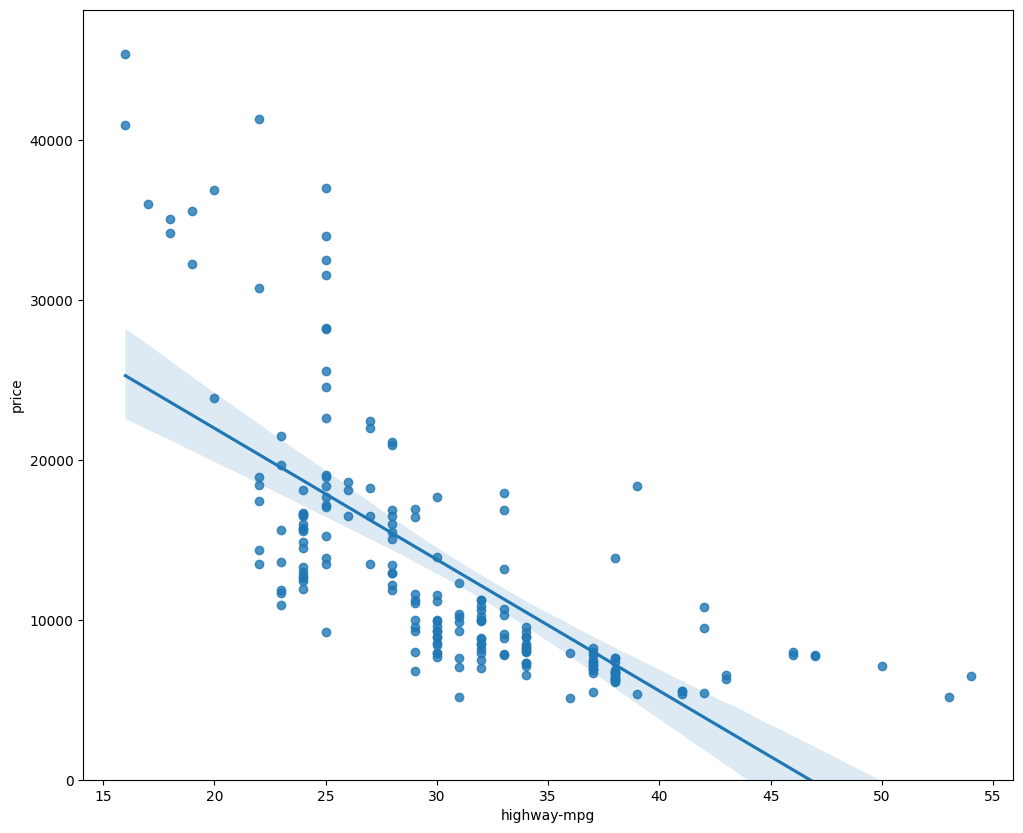

In [51]:
# Visualize highway-mpg as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

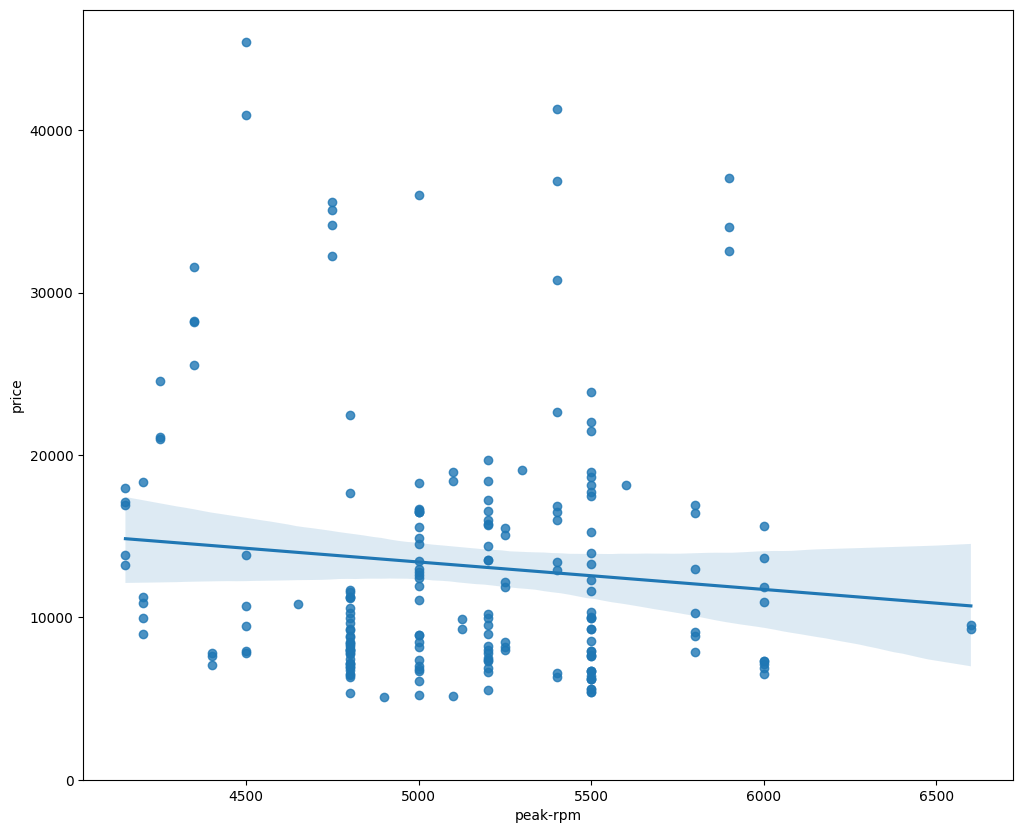

In [ ]:
# Visualize peak-rpm as potential predictor variable of price
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
# highway-mpg is more correlated to price than peak-rpm so highway-mpg may a good predictor for price variable
df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


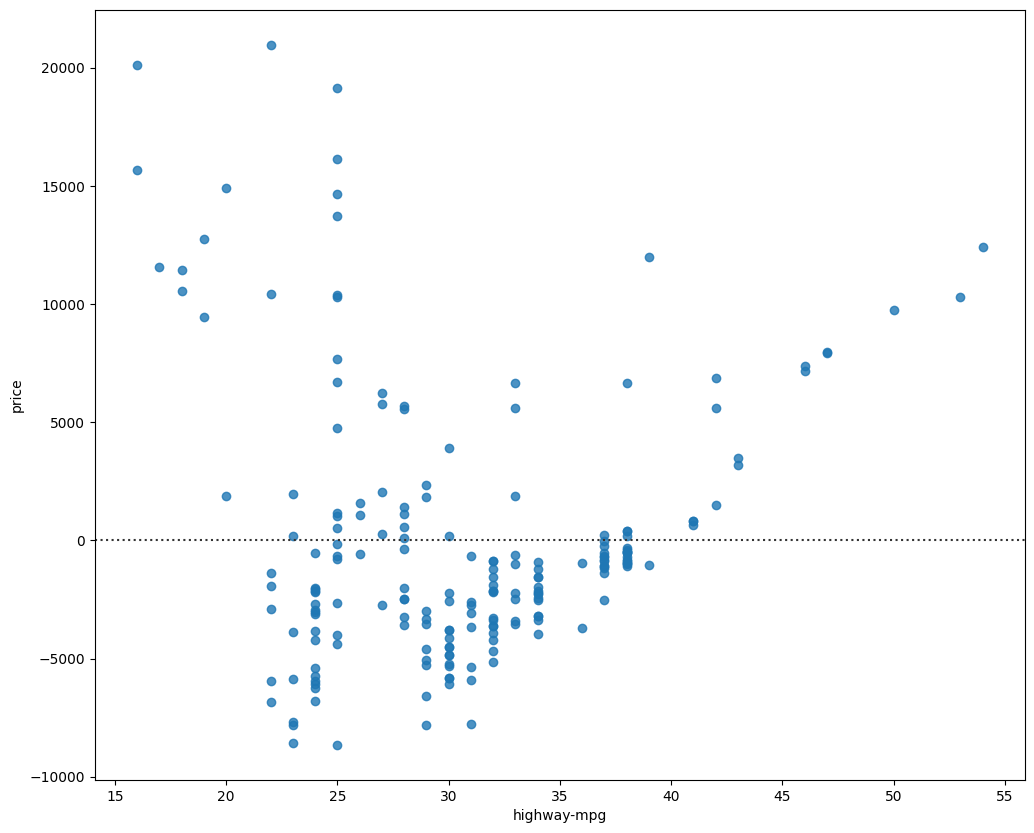

In [ ]:
# Make residual plot
# We can se that residual of the model are not randomly spread around the x-axis leading to believe that non-linear model is not appropiate for this data
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [55]:
# Multiple linear regression
Y_hat = lm.predict(Z)

C:\Users\62812\AppData\Local\Temp\ipykernel_31552\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\62812\AppData\Local\Temp\ipykernel_31552\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

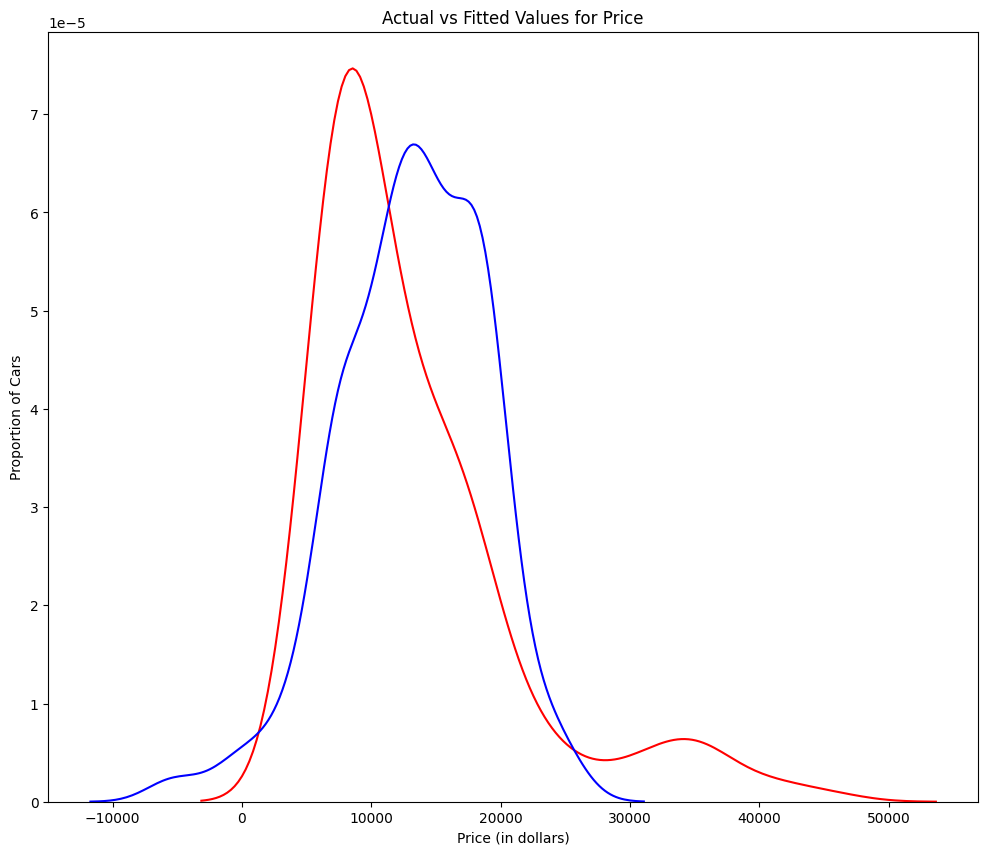

In [ ]:
# Fitted values are reasonably close to the actual values since the two distribution overlap a bit
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [60]:
# Polinomial regression
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [61]:
# Get the data
x = df['highway-mpg']
y = df['price']

In [62]:
# 3rd order polinomial
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


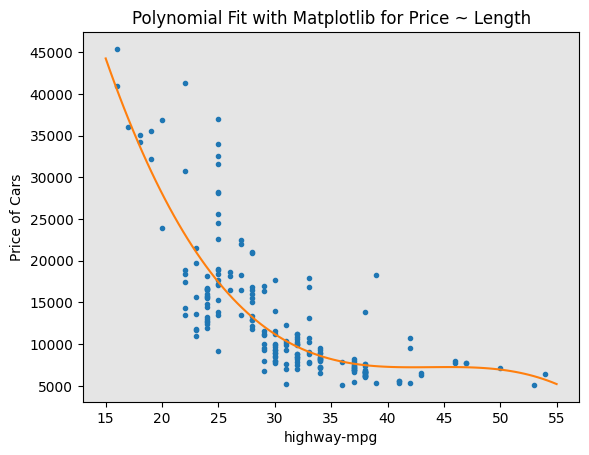

In [63]:
# Plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
# View coefficient and intercept
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [65]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


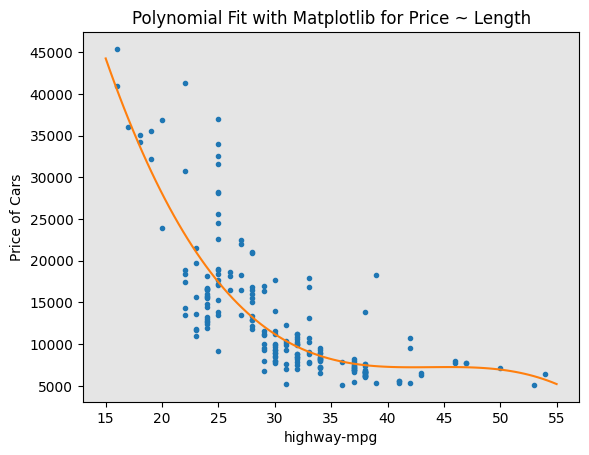

In [66]:
PlotPolly(p, x, y, 'highway-mpg')

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
# Create polinomial features object of degree 2
pr=PolynomialFeatures(degree=2)
pr

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [74]:
Z_pr=pr.fit_transform(Z)

In [ ]:
# In the original data there are 201 and 4 features
Z.shape

(201, 4)

In [77]:
# After the transformation, there are 201 and 15 features
Z_pr.shape

(201, 15)

In [78]:
# Using modul Pipeline to create pipeline and StandarScaler as a step in our pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
# Create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
# Input the list as an argument to standar pipeline constructor
pipe=Pipeline(Input)
pipe

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [ ]:
# First, convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
# Then, can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [ ]:
# Normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [83]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [ ]:
# Calculate R-square
# Highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

# 49% variation of price explained by simple linear model highway-mpg

The R-square is:  0.4965911884339176


In [ ]:
# Predict the output Yhat using predict method, where X is the input variable
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [89]:
# Import function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

In [90]:
# Compare predicted result with actual result
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [ ]:
# Calculate R-squared of multiple linear regression model
# Fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
# Calculate MSE
# Produce a prediction
Y_predict_multifit = lm.predict(Z)

In [93]:
# Compare the prediction result with the actual result
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [94]:
# Calculate R-squared of polinomial regression model
# Import function r2_score from the module metrics 
from sklearn.metrics import r2_score

In [95]:
# Apply the function to get r-squared value
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


In [96]:
# Calculate MSE
mean_squared_error(df['price'], p(x))

20474146.42636122

In [97]:
# Import pyplot for plotting and numpy 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [98]:
# Create new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [99]:
# Fit the model
lm.fit(X, Y)
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\62812\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

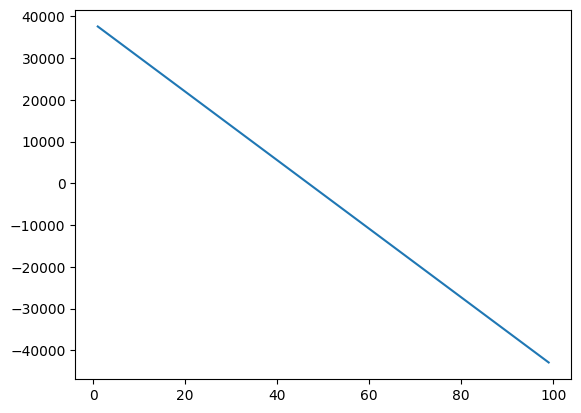

In [101]:
# Plot the data
plt.plot(new_input, yhat)
plt.show()

### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables, the better model is at predicting, but this is not always true. Sometimes may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

### Simple Linear Model (SLR) vs. Polynomial Fit

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

### Multiple Linear Regression (MLR) vs. Polynomial Fit

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

### Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.